In [31]:
import requests
import pandas as pd
import datetime as dt
def load_data():
    url = 'http://43.202.66.118:8077/all'
    r = requests.get(url)
    d = r.json()
    return d

data = load_data()
df = pd.DataFrame(data)

In [32]:
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29


In [40]:
df['request_time'] = pd.to_datetime(df['request_time'])

In [41]:
df['request_hour'] = df['request_time'].dt.strftime('%Y-%m-%d %H')

In [56]:
df1 = df.groupby(df['request_hour']).count()
df1['request_hour'] = df1.index
df1

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time,request_hour
request_hour,,,,,,,,,,
2024-09-25 10,10,10,10,10,10,10,10,10,10,2024-09-25 10
2024-09-25 11,9,9,9,9,9,9,9,9,9,2024-09-25 11
2024-09-25 12,32,32,32,32,32,32,32,32,32,2024-09-25 12
2024-09-25 14,226,226,226,226,226,226,226,226,226,2024-09-25 14
2024-09-25 15,16,16,16,16,16,16,16,16,16,2024-09-25 15
2024-09-25 16,11,11,11,11,11,11,11,11,11,2024-09-25 16


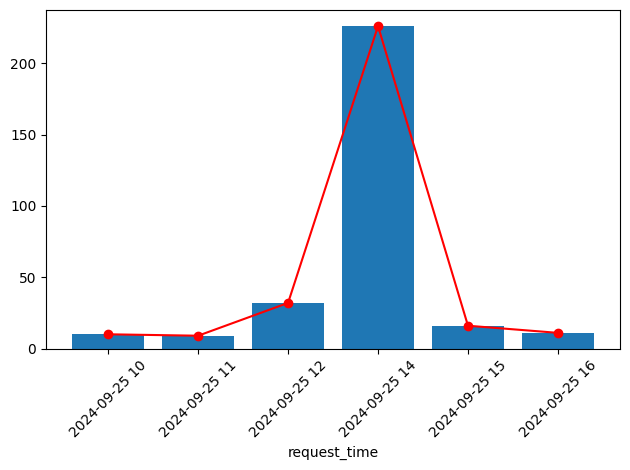

In [64]:
import matplotlib.pyplot as plt

plt.bar(df1['request_hour'], df1['num'])
plt.plot(df1['request_hour'], df1['num'], 'ro-')
plt.xlabel('request_time')
plt.xticks(rotation=45,fontsize=10)
plt.tight_layout()
plt.show()